In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [267]:
from sklearn.datasets import make_regression

In [268]:
X,y = make_regression(n_samples=100,n_features=2,n_informative=2)

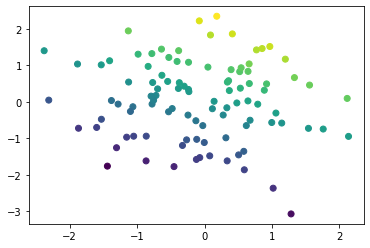

In [269]:
plt.scatter(X.T[0],X.T[1], c=y)

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [271]:
model=KNeighborsRegressor()

In [272]:
model.fit(X_train,y_train) # knn regression model was fitted.

KNeighborsRegressor()

#### Starting linear model here.

In [273]:
nearestneighbor=model.kneighbors(np.array(X_test[0]).reshape(-1,2))[1] # We located the neighbors.

In [274]:
neighbors_x = [] # x and y data were created from close neighbors here.
neighbors_y = []
for i in nearestneighbor:
    neighbors_x.append(X_train[i])
    neighbors_y.append(y_train[i])

In [275]:
neighbors_x = np.array(neighbors_x) # The list has been converted to np.array to be able to reshape.

In [276]:
neighbors_y = np.array(neighbors_y)

In [277]:
linermodel = LinearRegression() 

In [278]:
linermodel.fit(neighbors_x.reshape(-1,2),neighbors_y.reshape(-1,1)) 

LinearRegression()

In [279]:
linermodel.predict(np.array(X_test[0]).reshape(-1,2))# linear model predicted based on point X_test[0]

array([[18.16595607]])

In [280]:
y_test[0] # real data point.

18.16595607153592

#### This step was done for control purposes. KNN algorithm is predicting based on the X_test[0] point.

In [296]:
y_predknn = model.predict(np.array(X_test[0]).reshape(-1,2)) 

In [297]:
y_predknn # KNN models prediction

array([13.12238492])

In [283]:
model.kneighbors(np.array(X_test[0]).reshape(-1,2))

(array([[0.17600248, 0.18883015, 0.22451835, 0.24984053, 0.25311048]]),
 array([[27,  5, 49, 14, 56]], dtype=int64))

#### New algorithm is here with subclass example.

In [299]:
class LocalizedRegressor(KNeighborsRegressor):
    def predict(self,X):
        y_preds = []
        dist,inds=self.kneighbors(X)
        features = self._fit_X[inds]
        labels = self._y[inds] 
        for i in range(X.shape[0]):
            X_lin = features[i]
            y_lin = labels[i]
            model_for_this_point = LinearRegression()
            model_for_this_point.fit(X_lin,y_lin)
            prediction = model_for_this_point.predict(X[i:i+1])
            y_preds.append(prediction[0])
        y_preds = np.array(y_preds)
        return y_preds
            

In [300]:
m = LocalizedRegressor(n_neighbors=25)

In [301]:
m.fit(X_train,y_train)

LocalizedRegressor(n_neighbors=25)

In [302]:
m.predict(X_test[0:1])

array([18.16595607])

#### Another class creation method

In [288]:
class LocalizedRegressor: 
    
    def knn(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.model = KNeighborsRegressor(n_neighbors= int(input("Number of neighbor: ")))
        self.model.fit(self.X_train,self.y_train)
        
    def nearestneighbor(self,X_test):
        self.X_test = X_test
        self.nearestneighbor=self.model.kneighbors(np.array(self.X_test[0]).reshape(-1,2))[1]
        self.neighbors_x = [] # x and y data were created from close neighbors here.
        self.neighbors_y = []
        for i in self.nearestneighbor:
            self.neighbors_x.append(self.X_train[i])
            self.neighbors_y.append(self.y_train[i])
        self.neighbors_x = np.array(self.neighbors_x)
        self.neighbors_y = np.array(self.neighbors_y)
            
    def linermodel(self):
        self.linermodel = LinearRegression()
        self.linermodel.fit(self.neighbors_x.reshape(-1,2),self.neighbors_y.reshape(-1,1))
         
    def predict(self,m):
        result = self.linermodel.predict(np.array(self.X_test[m]).reshape(-1,2))
        return result

In [289]:
model1 = knnlin()

In [292]:
model1.knn(X_train,y_train)

Number of neighbor: 55


In [293]:
model1.nearestneighbor(X_test)

In [294]:
model1.linermodel()

In [295]:
model1.predict(0)

array([[18.16595607]])

#### Let's see how Localized regression performs by mixing the dataset a bit.

In [340]:
X, _ = make_regression(n_samples=100,n_features=2,n_informative=2)
y = 2. * X[:, 0] ** 2 - 0.7 * X[:, 1] ** 3 - 0.54

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [342]:
LocalReg = LocalizedRegressor(n_neighbors=25)

In [343]:
LocalReg.fit(X_train,y_train)

LocalizedRegressor(n_neighbors=25)

In [344]:
LocalReg.predict(X_test[0:1])

array([0.66437995])

In [345]:
y_test[0:1]

array([0.16625549])

In [346]:
linermodel = LinearRegression() 

In [347]:
linermodel.fit(X_train,y_train)

LinearRegression()

In [348]:
linermodel.predict(X_test[0:1])

array([0.98402932])

In [349]:
Knn_model=KNeighborsRegressor()

In [350]:
Knn_model.fit(X_train,y_train) # knn regression model was fitted.

KNeighborsRegressor()

In [352]:
Knn_model.score(X_test,y_test)

0.61302079238543

In [353]:
LocalReg.score(X_test,y_test)

0.7781300736386119